In [ ]:
# Week 3 Lab Activities - Data Analysis with Python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize



# **Activity 1: Loading and inspecting data**

---



In [ ]:

# Load the dataset
file_path = '/content/Untitled.csv'
df = pd.read_csv(file_path)
# You can also use the command
#df = pd.read_csv('student_admission_record_dirty.csv')


NameError: name 'pd' is not defined

In [ ]:
#Print the first 6 rows to inspect the data
df.head(6)


,Name,Age,Gender,Admission_Test_Score,High School Percentage,City,Admission_Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
5,Murtaza,23.0,Female,NaN,NaN,Islamabad,Accepted


In [ ]:
#Now Describe the Data
df.describe()

,Age,Admission_Test_Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


**Question: Why the above descrive outpt shows only three columns**

In [ ]:
#Question: Why it is not showing the data for all variables
#Wirte your answer here

#To get some more statistical functions, import stat
from os import stat


df.describe(include='object')

,Name,Gender,City,Admission_Status
count,147,147,147,147
unique,64,2,7,2
top,Shehroz,Female,Quetta,Rejected
freq,6,83,30,76


In [ ]:
#Now get the summary statistics for all columns:
df.describe(include='all')


,Name,Age,Gender,Admission_Test_Score,High School Percentage,City,Admission_Status
count,147,147.000000,147,146.000000,146.000000,147,147
unique,64,NaN,2,NaN,NaN,7,2
top,Shehroz,NaN,Female,NaN,NaN,Quetta,Rejected
freq,6,NaN,83,NaN,NaN,30,76
mean,NaN,19.680272,NaN,77.657534,75.684726,NaN,NaN
std,NaN,4.540512,NaN,16.855343,17.368014,NaN,NaN
min,NaN,-1.000000,NaN,-5.000000,-10.000000,NaN,NaN
25%,NaN,18.000000,NaN,68.250000,65.052500,NaN,NaN
50%,NaN,20.000000,NaN,79.000000,77.545000,NaN,NaN
75%,NaN,22.000000,NaN,89.000000,88.312500,NaN,NaN


**Now compare the above three tables. What do you learn about describe() , describe(include=["object"] and descrive(include="all")**

In [ ]:
#similar to include="object", you can also use exclude="object"
df.describe(exclude="object")

,Age,Admission_Test_Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission_Test_Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission_Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


# **Activity 2: Identifying Missing Values**

---



In [ ]:
# You have already learnt to identify total missing values in each column
# Recall what you learnt earlier and identify missing values in each column

df.isna().sum()

,0
Name,10
Age,10
Gender,10
Admission_Test_Score,11
High School Percentage,11
City,10
Admission_Status,10


**Is there any heading describing the output above? If no, we need to provide heading**

In [ ]:
#So we are adding a code before the df.isna command
print("Missing Values Count:")
#Here write the command you stated in the last code cell.
print(df.isna().sum())
print(" This table is very istresting")
#Now re-run it

# Why is this command "print("Missing Values Count:")" before the next one?
#This is inorder to provide heading to the data


Missing Values Count:
Name                      10
Age                       10
Gender                    10
Admission_Test_Score      11
High School Percentage    11
City                      10
Admission_Status          10
dtype: int64
 This table is very istresting


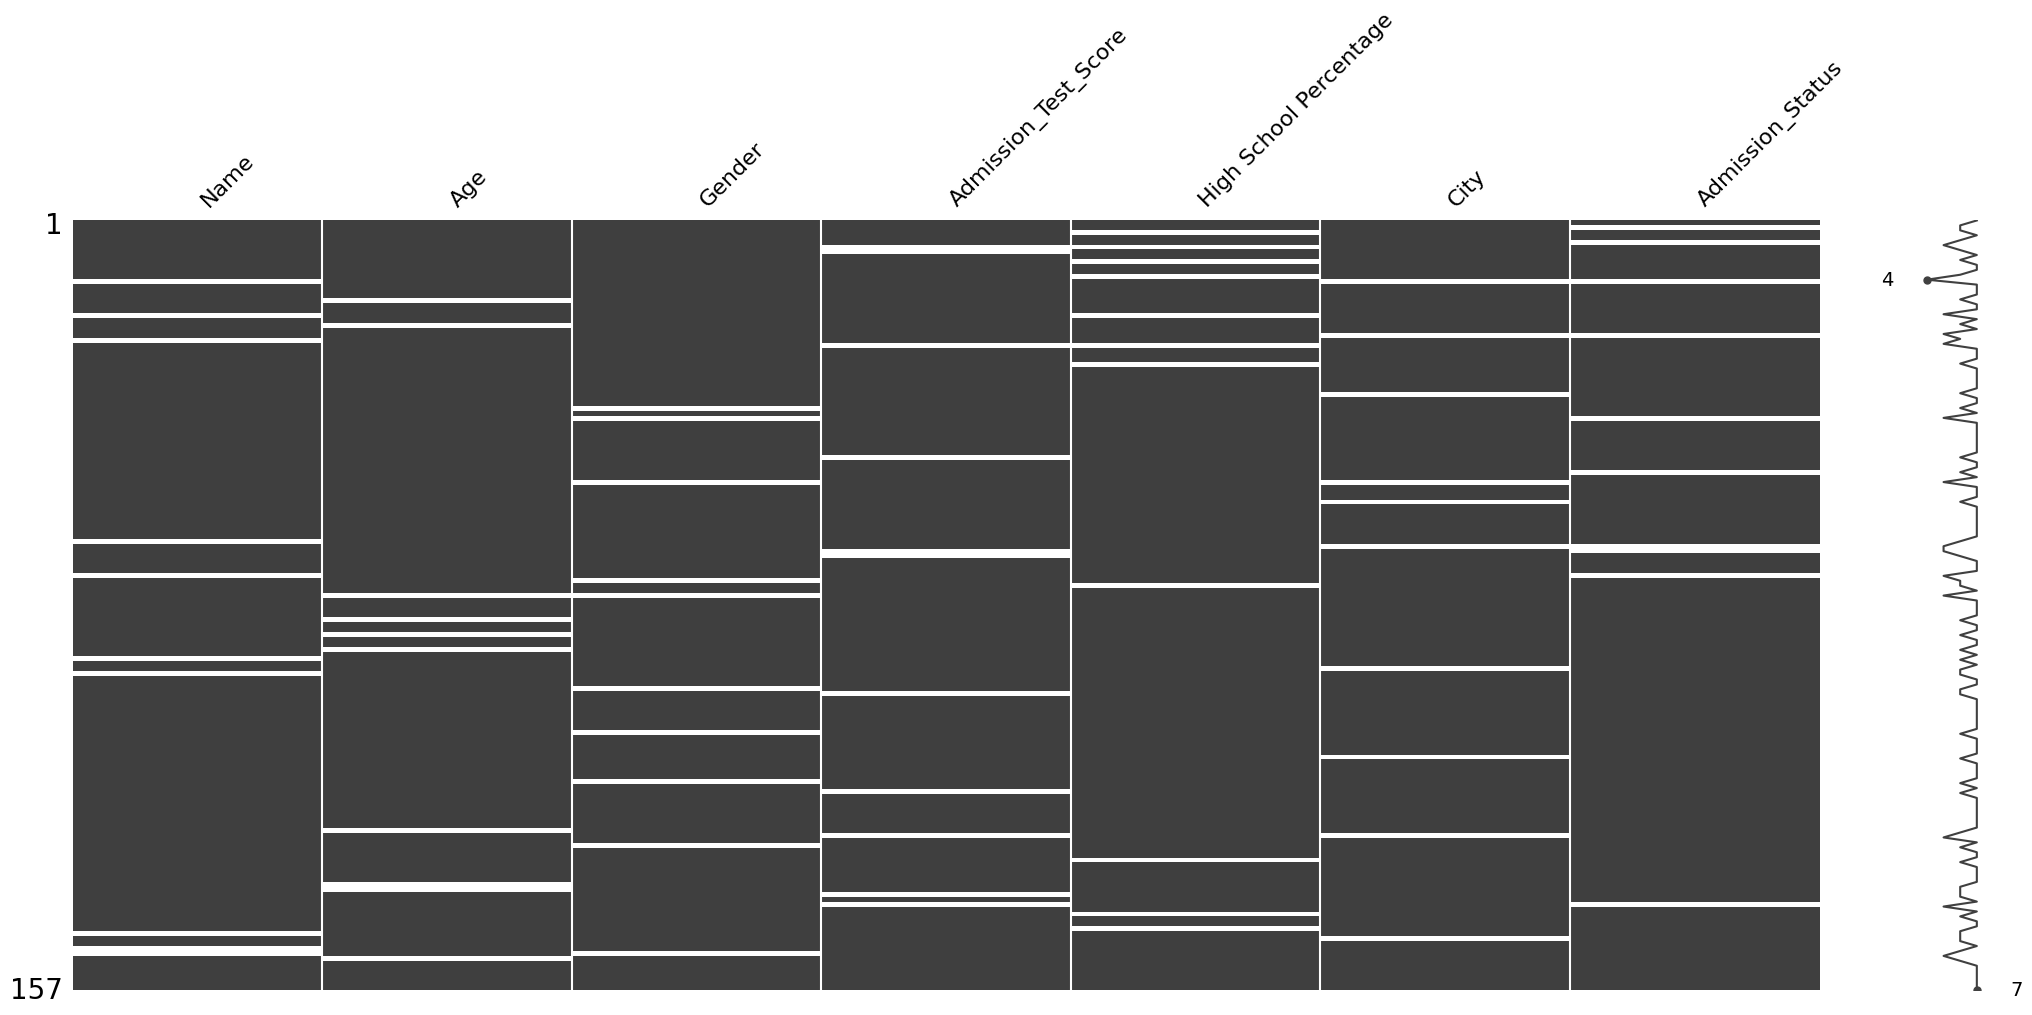

In [ ]:
# Visualize missing data
import missingno as msno
msno.matrix(df)
plt.show()



In [ ]:
# Drop missing values from only "Age" column
df_cleaned= df.dropna(subset=['Age'])
# Wirte code here to drp missing calues from Age column
#Then print below command
print("Before:", df.shape, "After:", df_cleaned.shape)


Before: (157, 7) After: (147, 7)


In [ ]:
#Droping missing values from all columns
df_cleaned = df.dropna()
print("Before:", df.shape, "After:", df_cleaned.shape)


Before: (157, 7) After: (100, 7)


In [ ]:
# Fill missing values with mean, median, or mode for each column
# Fill missing values with the column's mean for numerical columns and mode for categorical columns
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        #Fill with mean if numerical
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        # Fill with mode if categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
# The primary goal of this code (loop) is to handle missing values (represented as NaN - Not a Number)
#within a Pandas DataFrame (df) in a way that is appropriate for different types of data.
# Specifically, it differentiates between numerical columns
#and categorical (non-numerical) columns and fills the NaN values in each column appropriately.
# Check if fillna was successful
#Inplace=True Explnation: Most Pandas methods (like fillna) return a new Series (or DataFrame)
#with the changes applied. The original object is left unchanged.
#inplace=True modifies the Series directly, without creating a new copy.


<ipython-input-35-fa3833f476be>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-35-fa3833f476be>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
#Now check if the missing values are filled
print(df.isna().sum())


Name                      0
Age                       0
Gender                    0
Admission_Test_Score      0
High School Percentage    0
City                      0
Admission_Status          0
dtype: int64


# **Activity 3: Finding and Removing Duplicates**

---



In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
152,False
153,False
154,False
155,False


In [ ]:

## Activity 3: Finding and Removing Duplicates
# Remove duplicates based on a specific column (e.g., 'Name')
df_no_duplicates_column = df.drop_duplicates(subset=['Name'])
print("Before:", df.shape, "After (based on Name):", df_no_duplicates_column.shape)
# Identify duplicate records
print("Duplicate count:", df.duplicated().sum())


Before: (157, 7) After (based on Name): (64, 7)
Duplicate count: 7


In [ ]:

# Display duplicate rows
print(df[df.duplicated()])



        Name   Age  Gender  Admission_Test_Score  High School Percentage  \
22    Kamran  18.0    Male                  53.0                   98.98   
52     Ahmed  21.0    Male                  62.0                   79.03   
88     Aliya  17.0    Male                  55.0                   85.29   
109  Mehwish  18.0  Female                  72.0                   67.51   
110    Hamza  22.0    Male                  99.0                   86.58   
120   Ayesha  24.0    Male                  94.0                   98.43   
122     Tuba  17.0  Female                  75.0                   78.43   

         City Admission_Status  
22     Multan         Rejected  
52    Karachi         Accepted  
88    Karachi         Rejected  
109    Quetta         Accepted  
110    Multan         Accepted  
120    Multan         Rejected  
122  Peshawar         Accepted  


In [ ]:
# Remove duplicates
df_no_duplicates = df.drop_duplicates()



In [ ]:
# Check dataset before and after removing duplicates
print("Before:", df.shape, "After:", df_no_duplicates.shape)



Before: (157, 7) After: (150, 7)


# **Activity 4: Identifying Outliers**

---



In [ ]:
df.describe()

,Age,Admission_Test_Score,High School Percentage
count,157.000000,157.000000,157.000000
mean,19.680272,77.657534,75.684726
std,4.392573,16.250222,16.744488
min,-1.000000,-5.000000,-10.000000
25%,18.000000,71.000000,66.830000
50%,20.000000,77.657534,75.684726
75%,22.000000,89.000000,87.000000
max,24.000000,150.000000,110.500000


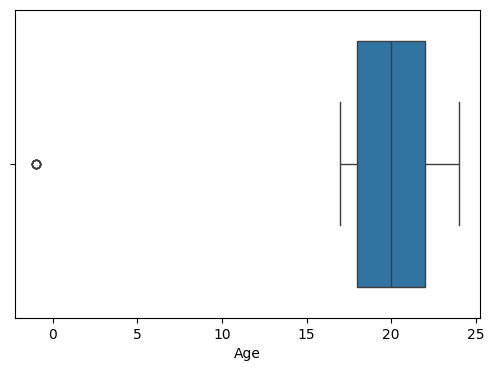

In [ ]:
## Activity 4: Identifying Outliers
# Box plot for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])  # Replace with actual numeric column
plt.show()


In [ ]:

# Z-score method
df['z_score'] = zscore(df['Age'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers detected:")
print(outliers)

#Emptry DataFrame that means no outliers detected


Outliers detected:
        Name  Age  Gender  Admission_Test_Score  High School Percentage  \
23     Aliya -1.0    Male                 101.0                   54.59   
50   Shehroz -1.0  Female                  61.0                   69.48   
89   Shehroz -1.0    Male                  66.0                   79.07   
113  Zunaira -1.0  Female                  84.0                   58.77   
155   Shoaib -1.0    Male                  91.0                   80.12   

           City Admission_Status   z_score  
23       Quetta         Rejected -4.723074  
50       Quetta         Rejected -4.723074  
89   Rawalpindi         Rejected -4.723074  
113      Quetta         Rejected -4.723074  
155      Quetta         Accepted -4.723074  


In [ ]:

# IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers detected using IQR:")
print(outliers_iqr)


Outliers detected using IQR:
        Name  Age  Gender  Admission_Test_Score  High School Percentage  \
23     Aliya -1.0    Male                 101.0                   54.59   
50   Shehroz -1.0  Female                  61.0                   69.48   
89   Shehroz -1.0    Male                  66.0                   79.07   
113  Zunaira -1.0  Female                  84.0                   58.77   
155   Shoaib -1.0    Male                  91.0                   80.12   

           City Admission_Status   z_score  
23       Quetta         Rejected -4.723074  
50       Quetta         Rejected -4.723074  
89   Rawalpindi         Rejected -4.723074  
113      Quetta         Rejected -4.723074  
155      Quetta         Accepted -4.723074  


# **Activity 5: Handling the Outliers**

---



In [ ]:

## Activity 5: Handling Outliers
# Cap extreme values at upper and lower bounds
df_capped = df.copy()
df_capped['Age'] = np.clip(df['Age'], lower_bound, upper_bound)
print("Capped dataset:")
print(df_capped)



Capped dataset:
        Name   Age  Gender  Admission_Test_Score  High School Percentage  \
0    Shehroz  24.0  Female                  50.0               68.900000   
1      Waqar  21.0  Female                  99.0               60.730000   
2     Bushra  17.0    Male                  89.0               75.684726   
3      Aliya  17.0    Male                  55.0               85.290000   
4      Bilal  20.0    Male                  65.0               61.130000   
..       ...   ...     ...                   ...                     ...   
152      Ali  19.0  Female                  85.0               78.090000   
153    Bilal  17.0  Female                  81.0               84.400000   
154   Fatima  21.0  Female                  98.0               50.860000   
155   Shoaib  12.0    Male                  91.0               80.120000   
156     Maaz  17.0    Male                  88.0               86.850000   

          City Admission_Status   z_score  
0       Quetta         Reje

In [ ]:

# Winsorization
df['Winsorized'] = winsorize(df['Age'], limits=[0.05, 0.05])


# **Activity 6: Exploring Data and Drawing Conclusions **

---



In [ ]:
# Show the Rejected in "Admission Status" column who have more than 70 in High School Percentage

rejected_high_percentage = df[(df['Admission_Status'] == 'Rejected') & (df['High School Percentage'] > 70)]
rejected_high_percentage


,Name,Age,Gender,Admission_Test_Score,High School Percentage,City,Admission_Status,z_score,Winsorized
3,Aliya,17.000000,Male,55.000000,85.290000,Karachi,Rejected,-0.612135,17.000000
9,Kamran,18.000000,Male,53.000000,98.980000,Multan,Rejected,-0.383750,18.000000
12,Shehroz,19.000000,Male,66.000000,88.170000,Quetta,Rejected,-0.155364,19.000000
15,Saim,19.000000,Male,84.000000,97.190000,Peshawar,Rejected,-0.155364,19.000000
16,Mahnoor,19.680272,Male,61.000000,74.080000,Islamabad,Rejected,0.000000,19.680272
17,Uzma,17.000000,Female,96.000000,93.340000,Karachi,Rejected,-0.612135,17.000000
19,Shehroz,19.000000,Male,84.000000,75.684726,Islamabad,Rejected,-0.155364,19.000000
20,Waqar,22.000000,Male,77.000000,94.020000,Peshawar,Rejected,0.529792,22.000000
21,Fatima,19.680272,Female,79.000000,73.230000,Quetta,Rejected,0.000000,19.680272
22,Kamran,18.000000,Male,53.000000,98.980000,Multan,Rejected,-0.383750,18.000000


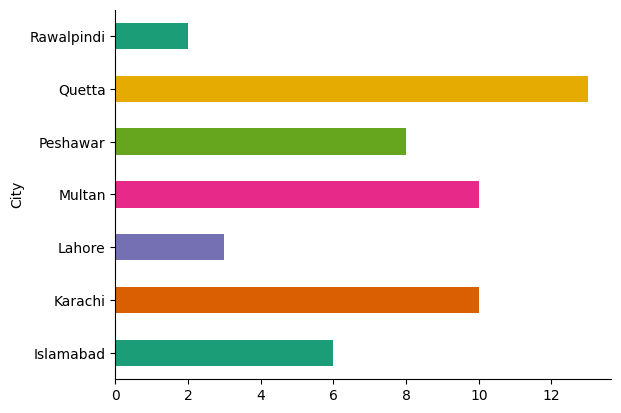

In [ ]:
# Graph of City-wise rejected applicants with high percentage

from matplotlib import pyplot as plt
import seaborn as sns
rejected_high_percentage.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Student Challenge:**
1. Fetch the candidates accepted but have less than 60 % High School Average
2. Fetch the students with more than 70 admission test score but got rejected

In [ ]:
#1.Fetch the candidates accepted but have less than 60 % High School Average


In [ ]:
#Fetch the students with more than 70 admission test score but got rejected


In [ ]:
# Fetch the students with more than 70 admission test score but got rejected

# Fetch the students with more than 70 admission test score but got rejected
rejected_high_score = df[(df['Admission_Test Score'] > 70) & (df['Admission Status'] == 'Rejected')]
rejected_high_score


In [ ]:
# Generate Admission_Test Score

from matplotlib import pyplot as plt
rejected_high_score['Admission_Test Score'].plot(kind='hist', bins=20, title='Admission_Test Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **    We will cover the plots in detail in the next sesssion. For now, look at the chart above and tell what is wrong with the admission test score data?**

# **Activity 7: Exporting Data and Saving a new file**

In [ ]:
#Save the cleaned dataset to a new CSV file.
df.to_csv("Cleaned_StudentAdmission_data.csv", index=False)
#Important: This command will create a new data set that would appear on left handside
# You can download that file for your record.

In [ ]:
# !pip install --upgrade visions --use-deprecated=legacy-resolver
#!pip uninstall pandas-profiling -y
!pip install visions==0.7.6 --use-deprecated=legacy-resolver

!pip install --upgrade numba --use-deprecated=legacy-resolver
# !pip install --upgrade pandas-profiling --use-deprecated=legacy-resolver
!pip install ydata-profiling --use-deprecated=legacy-resolver

